In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, LeakyReLU
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
file=pd.read_csv('trainng_file.csv')
scaler = StandardScaler()
file.describe

<bound method NDFrame.describe of             Time  Price_open  Price_high   Price_low  Price_close    FIB_1_MA  \
0      3/16/2012    2.352471    2.392664    2.321998     2.348998    2.055048   
1      3/19/2012    2.350735    2.354665    2.302664     2.334998    2.060592   
2      3/20/2012    2.342866    2.346664    2.304665     2.328498    2.065897   
3      3/21/2012    2.335682    2.353331    2.306665     2.333164    2.071189   
4      3/22/2012    2.334423    2.343330    2.286664     2.313664    2.075991   
...          ...         ...         ...         ...          ...         ...   
2962  12/22/2023  252.612938  258.220000  251.370000   254.722500  238.232220   
2963  12/26/2023  253.667719  257.970000  252.910000   255.495000  238.574057   
2964  12/27/2023  254.581360  263.340000  254.581360   260.162500  239.001551   
2965  12/28/2023  257.371930  265.130000  252.710000   258.670000  239.391025   
2966  12/29/2023  258.020965  258.020965  247.430000   251.550000  239.6317

In [3]:
fileD=pd.to_datetime(file['Time'])
file=file.replace({' -   ': '0', '_': '0', '-': '0', ',': ''}, regex=True)
train_data=file.iloc[:,1:]

scaler=MinMaxScaler()
trainX = scaler.fit_transform(train_data)
trainY = trainX [:,33:34]

In [5]:
TimeseriesGenerator(trainX,trainY,length=30,sampling_rate=1,batch_size=5)[0] # for testting

(array([[[1.37498860e-03, 1.34735510e-03, 1.55896573e-03, ...,
          8.66723681e-01, 8.47011964e-01, 3.65937431e-01],
         [1.37067230e-03, 1.25527194e-03, 1.51040331e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65986203e-01],
         [1.35110722e-03, 1.23588308e-03, 1.51542935e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65981409e-01],
         ...,
         [8.62726003e-04, 8.78852719e-04, 1.09680390e-03, ...,
          1.25138512e-01, 9.49676261e-02, 3.64499076e-01],
         [8.88695924e-04, 9.64472928e-04, 1.14424356e-03, ...,
          1.25138512e-01, 9.49676261e-02, 3.64798676e-01],
         [9.60526563e-04, 9.82245446e-04, 1.21680839e-03, ...,
          1.51646287e-01, 1.15219827e-01, 3.65024074e-01]],
 
        [[1.37067230e-03, 1.25527194e-03, 1.51040331e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65986203e-01],
         [1.35110722e-03, 1.23588308e-03, 1.51542935e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65981409e-01],
       

In [4]:
X_train,X_test,y_train,y_test = train_test_split(trainX,trainY, test_size=0.20,random_state=20, shuffle=False)

In [5]:
win_length=30
batch_size=5

train_generator=TimeseriesGenerator(X_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

train_generator[0]

(array([[[1.37498860e-03, 1.34735510e-03, 1.55896573e-03, ...,
          8.66723681e-01, 8.47011964e-01, 3.65937431e-01],
         [1.37067230e-03, 1.25527194e-03, 1.51040331e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65986203e-01],
         [1.35110722e-03, 1.23588308e-03, 1.51542935e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65981409e-01],
         ...,
         [8.62726003e-04, 8.78852719e-04, 1.09680390e-03, ...,
          1.25138512e-01, 9.49676261e-02, 3.64499076e-01],
         [8.88695924e-04, 9.64472928e-04, 1.14424356e-03, ...,
          1.25138512e-01, 9.49676261e-02, 3.64798676e-01],
         [9.60526563e-04, 9.82245446e-04, 1.21680839e-03, ...,
          1.51646287e-01, 1.15219827e-01, 3.65024074e-01]],
 
        [[1.37067230e-03, 1.25527194e-03, 1.51040331e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65986203e-01],
         [1.35110722e-03, 1.23588308e-03, 1.51542935e-03, ...,
          8.58313712e-01, 8.61182830e-01, 3.65981409e-01],
       

In [104]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(win_length, trainX.shape[1]), return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            39680     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,129
Trainable params: 52,129
Non-trai

In [106]:
model.compile(loss=tf.losses.MeanAbsoluteError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

In [107]:
# fit the model
history = model.fit(train_generator, validation_data=test_generator, epochs=50, shuffle=False, verbose=1)
model.save('star_pro_weights_2.1.h5')

Epoch 1/50
469/469 [==============================] - 12s 21ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.1691 - val_mean_absolute_error: 0.1691
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.1688 - val_mean_absolute_error: 0.1688
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.1099 - val_mean_absolute_error: 0.1099
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376
Epoch 5/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0810 - val_mean_absolute_error: 0.0810
Epoch 6/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - val_loss: 0.1023 - val_mean_absolute_error: 0.1023
Epoch 7/5

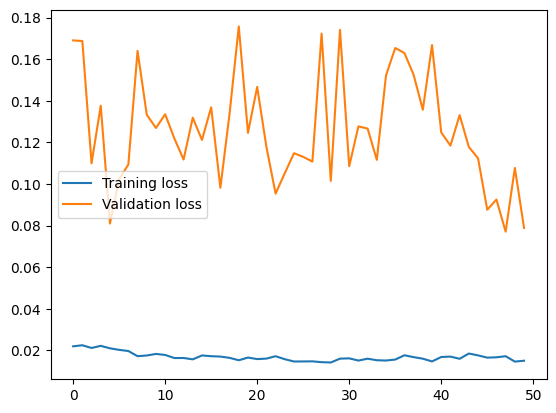

In [109]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [110]:
model.evaluate_generator(test_generator,verbose=0)

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16188\267665090.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)


[0.0788353979587555, 0.0788353979587555]

In [9]:
from tensorflow.keras.models import load_model
model_1=load_model('star_pro_weights_2.1.h5', compile=False)

In [ ]:
prediction=model_1.predict(test_generator)
prediction.shape

113/113 [==============================] - 1s 5ms/step


(564, 1)

In [126]:
condat=X_test[:,1:][win_length:]

df_pre=pd.concat([pd.DataFrame(prediction), pd.DataFrame(condat)], axis=1)
rev_transform=scaler.inverse_transform(df_pre)

df_final=train_data[prediction.shape[0]*-1:]


In [130]:
df_final['pre_target']=rev_transform[:,0]
rev_transform[:,0]

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16188\2365229939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pre_target']=rev_transform[:,0]


array([249.53839595, 251.79463958, 250.58526212, 250.34850721,
       251.50114116, 251.01490181, 251.92207874, 253.30000863,
       254.63560264, 255.93868959, 258.12325468, 261.37885048,
       263.81347536, 265.28919011, 268.19588646, 270.34331776,
       275.6967692 , 279.01354346, 283.08859988, 287.67197457,
       292.25465404, 297.82736028, 301.12720978, 304.86571272,
       309.18761659, 311.79582818, 311.15539607, 308.78847024,
       305.5110113 , 306.29983474, 301.59621273, 298.70730417,
       297.58302998, 299.26759536, 300.21849859, 303.18114734,
       307.58546953, 305.95584971, 305.24016713, 303.64636259,
       304.04474181, 305.30498945, 304.30906539, 302.5819244 ,
       299.54134023, 296.09782202, 296.19692538, 295.60168192,
       292.86821269, 290.59653061, 287.14196096, 283.72313469,
       281.51965509, 279.56755379, 275.73646808, 272.5204513 ,
       270.23369035, 271.86256703, 275.22021483, 278.28434025,
       280.42879892, 281.1061251 , 280.78215731, 278.64

In [131]:
df_final.columns

Index(['Price_open', 'Price_high', 'Price_low', 'Price_close', 'FIB_1_MA',
       'FIB_1_1', 'FIB_1_2', 'FIB_1_3', 'FIB_1_4', 'FIB_1_5', 'FIB_1_6',
       'FIB_1_7', 'FIB_1_8', 'FIB_1_9', 'FIB_1_10', 'FIB_1_11', 'FIB_1_12',
       'FIB_2_MA', 'FIB_2_1', 'FIB_2_2', 'FIB_2_3', 'FIB_2_4', 'FIB_2_5',
       'FIB_2_6', 'FIB_2_7', 'FIB_2_8', 'FIB_2_9', 'FIB_2_10', 'FIB_2_11',
       'FIB_2_12', 'TS4_level_0', 'TS4_level_1', 'TS4_level_2', 'TS4_Target',
       'TS4_level_4', 'TS4_level_5', 'RSHVB_Middle', 'RSHVB_Up ',
       'RSHVB_Down ', 'JFPCC_Plot', 'T3V_Velocity', 'RSI_MA', 'RSI_Spot',
       'MFI_Spot', 'MFI_MA', 'Senti_Spot', 'Accum_Plot', 'BBWP_Spot',
       'BBWP_MA', 'DMI_Hist', 'DMI_Spot', 'DMI_MA', 'DMI_ADX', 'PMAR_Spot',
       'PMAR_MA', 'Sorch_K', 'Sorch_D', 'WT_Spot', 'WT_MA', 'WT_Hist',
       'VRSI_1', 'VRSI_2', 'VRSI_3', 'VRSI_MA', 'VRSI_4', 'TTF_Slow_Up',
       'TTF_MA', 'TTF_Spot', 'TTF_Slow_Mid', 'PtoE_Spot', 'PtoB_Spot',
       'PtoCF_Spot', 'PtoS_Spot', 'SQZM_Spot', '

<AxesSubplot: >

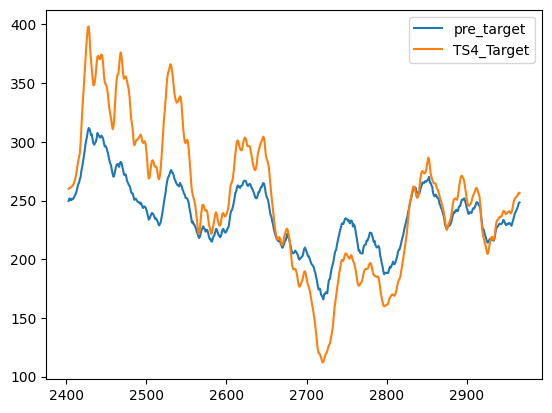

In [132]:
df_final[['pre_target','TS4_Target']].plot()

In [134]:
# testing prediction

In [ ]:
prediction=model_1.predict(test_generator[0][0])

prediction,test_generator[0][1]

1/1 [==============================] - 0s 34ms/step


(array([[0.6159656],
        [0.6215754],
        [0.6185685],
        [0.6179798],
        [0.6208457]], dtype=float32),
 array([[0.65118574],
        [0.65294963],
        [0.65320622],
        [0.65469475],
        [0.65639248]]))

In [23]:
prediction_copies = np.repeat(prediction, trainX.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

true_copies = np.repeat(test_generator[0][1], trainX.shape[1], axis=-1)
y_true_future = scaler.inverse_transform(true_copies)[:,0]

y_pred_future,y_true_future

(array([249.5384 , 251.79465, 250.58527, 250.34851, 251.50114],
       dtype=float32),
 array([263.70379573, 264.41322459, 264.51642455, 265.11510443,
        265.79792712]))

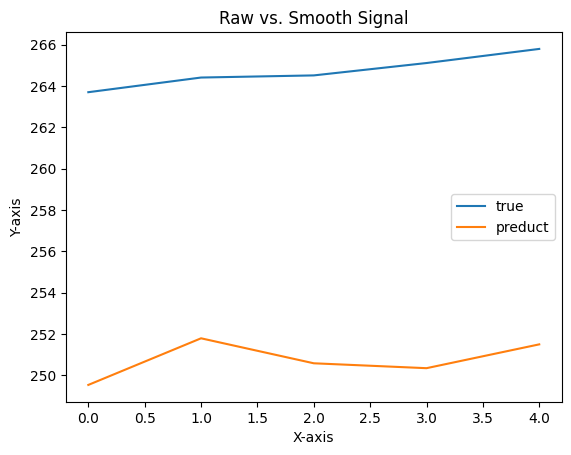

In [24]:
plt.plot(y_true_future, label='true')
plt.plot(y_pred_future, label='preduct')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Raw vs. Smooth Signal')
plt.legend()
plt.show()

In [25]:
len(test_generator)

113

In [26]:
test_generator[110][1]

array([[0.60310518],
       [0.60146807],
       [0.59809471],
       [0.60041255],
       [0.60801267]])

In [44]:
pre_df=[]
tru_df=[]

for i in range(len(test_generator)):
    tt=model_1.predict(test_generator[i][0])
    prediction_copies = np.repeat(tt, trainX.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
    pre_df.extend(y_pred_future)
    
    ttt=test_generator[i][1]
    true_copies = np.repeat(ttt, trainX.shape[1], axis=-1)
    y_true_future = scaler.inverse_transform(true_copies)[:,0]
    tru_df.extend(y_true_future)

1/1 [==============================] - 0s 29ms/step


In [50]:
len(pre_df),len(tru_df)

(564, 564)

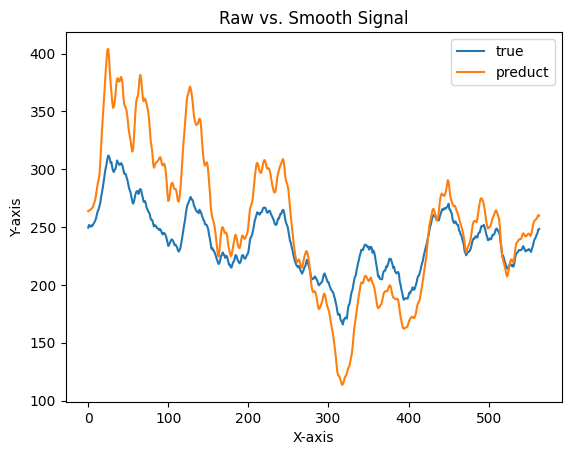

In [52]:
plt.plot(pre_df, label='true')
plt.plot(tru_df, label='preduct')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Raw vs. Smooth Signal')
plt.legend()
plt.show()

In [165]:
sets=3
eval_batch=X_train[-win_length*sets:]
current_batch=eval_batch.reshape((sets,win_length,trainX.shape[1]))
current_batch.shape

(3, 30, 90)

In [167]:
model.predict(current_batch), y_test[:sets]

1/1 [==============================] - 0s 35ms/step


(array([[0.5219285],
        [0.5627333],
        [0.5741913]], dtype=float32),
 array([[0.56879618],
        [0.5705479 ],
        [0.57589918]]))

In [15]:
sets=10
eval_batch=X_test[-win_length*sets:]
current_batch=eval_batch.reshape((sets,win_length,trainX.shape[1]))
tt=model_1.predict(current_batch)
tt,y_test[:sets]

1/1 [==============================] - 0s 36ms/step


(array([[0.51414895],
        [0.43711525],
        [0.5724163 ],
        [0.519581  ],
        [0.5186358 ],
        [0.65450186],
        [0.564044  ],
        [0.5963118 ],
        [0.55829054],
        [0.6098909 ]], dtype=float32),
 array([[0.56879618],
        [0.5705479 ],
        [0.57589918],
        [0.58168261],
        [0.58542034],
        [0.58779819],
        [0.59156487],
        [0.59740204],
        [0.60322407],
        [0.6074982 ]]))

In [24]:
prediction_copies = np.repeat(tt, trainX.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

prediction_copies = np.repeat(y_test, trainX.shape[1], axis=-1)
y_true_future = scaler.inverse_transform(prediction_copies)[:,0]

In [51]:
y_true_future[:sets],y_pred_future[:sets]

(array([230.56704036, 231.27157484, 233.42383831, 235.74990968,
        237.25320944, 238.20957183, 239.72451566, 242.07220447,
        244.41380093, 246.13283798]),
 array([208.58815, 177.60548, 232.02306, 210.7729 , 210.39275, 265.03754,
        228.65575, 241.63373, 226.34172, 247.09517], dtype=float32))

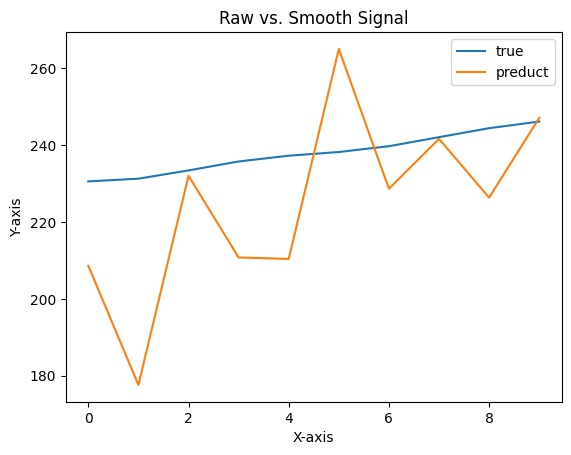

In [50]:
plt.plot(y_true_future[:sets], label='true')
plt.plot(y_pred_future[:sets], label='preduct')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Raw vs. Smooth Signal')
plt.legend()
plt.show()